# Diabetes Prediction

## About the dataset

<p>This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes</p>
<p>1) Pregnancies              : Number of times pregnant</p>
<p>2) Glucose                  : Plasma glucose concentration a 2 hour in an oral glucose tolerance test</p>
<p>3) Blood Pressure           : Diastolic Blood pressure (mm Hg)</p>
<p>4) SkinThickness            : Triceps skin fold thickness(mm)</p>
<p>5) Insulin                  : 2-hour serum insulin (mu U/ml)</p>
<p>6) DiabetesPedigreeFunction : Diabetes Pedigree Function</p>
<p>7) Age                      : Age</p>
<p>8) Outcome                  : 1 - Diabetes, 0 - No diabetes

In [71]:
# import needed libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [72]:
# Read the dataset with pandas
dia_df = pd.read_csv('diabetes.csv')
dia_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [73]:
# Get the quick info about dataset
dia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [92]:
# Disripition of data set
dia_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,3.860724,121.811978,72.240947,26.819587,121.197532,32.331992,0.477648,33.344011,0.341226
std,3.353649,30.617668,11.487141,9.769670,95.503871,6.655515,0.336281,11.822374,0.474451
min,0.000000,44.000000,38.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,20.536458,79.799479,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.500000,79.799479,32.150000,0.380500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,131.500000,36.500000,0.630500,41.000000,1.000000
max,17.000000,199.000000,106.000000,99.000000,846.000000,59.400000,2.420000,81.000000,1.000000


## Data Preprocessing

In [75]:
# Seeking the null values
dia_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [76]:
dia_df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [77]:
# detecting the number of rows that contains 0 in Insulin cloumn
(dia_df[dia_df.Insulin==0])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [78]:
# Imputing the value with mean value
dia_df.Insulin.replace(to_replace=0,value=dia_df.Insulin.mean(),inplace=True)

In [79]:
# detecting the number of rows that contains 0 in Skin Thickness cloumn
dia_df[dia_df['SkinThickness']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,79.799479,23.3,0.672,32,1
5,5,116,74,0,79.799479,25.6,0.201,30,0
7,10,115,0,0,79.799479,35.3,0.134,29,0
9,8,125,96,0,79.799479,0.0,0.232,54,1
10,4,110,92,0,79.799479,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,79.799479,36.3,0.258,52,1
758,1,106,76,0,79.799479,37.5,0.197,26,0
759,6,190,92,0,79.799479,35.5,0.278,66,1
762,9,89,62,0,79.799479,22.5,0.142,33,0


In [80]:
# Imputing the value with mean value
dia_df.SkinThickness.replace(to_replace=0,value=dia_df.SkinThickness.mean(),inplace=True)

In [81]:
# detecting the number of rows that contains 0 in  cloumn
dia_df[dia_df['BMI']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,20.536458,79.799479,0.0,0.232,54,1
49,7,105,0,20.536458,79.799479,0.0,0.305,24,0
60,2,84,0,20.536458,79.799479,0.0,0.304,21,0
81,2,74,0,20.536458,79.799479,0.0,0.102,22,0
145,0,102,75,23.000000,79.799479,0.0,0.572,21,0
371,0,118,64,23.000000,89.000000,0.0,1.731,21,0
426,0,94,0,20.536458,79.799479,0.0,0.256,25,0
494,3,80,0,20.536458,79.799479,0.0,0.174,22,0
522,6,114,0,20.536458,79.799479,0.0,0.189,26,0
684,5,136,82,20.536458,79.799479,0.0,0.640,69,0


In [82]:
# Imputing the value with mean value
dia_df['BMI'].replace(to_replace=0,value=dia_df['BMI'].mean(),inplace=True)

### Detecting and removing the outliers

In [83]:
# removing outliers in Blood pressure column
q1 = dia_df.BloodPressure.quantile(0.25)
q3 = dia_df.BloodPressure.quantile(0.75)

In [84]:
IQR = q3-q1
upper = q3+1.5*IQR
lower = q1-1.5*IQR

In [85]:
upper,lower

(107.0, 35.0)

In [86]:
dia_df = dia_df[(dia_df.BloodPressure>lower)&(dia_df.BloodPressure<upper)]

In [87]:
dia_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


In [88]:
# removing outliers in glucose cloumn
q1=dia_df.Glucose.quantile(0.25)
q3=dia_df.Glucose.quantile(0.75)

In [89]:
IQR = q3-q1
upper,lower = q3+1.5*IQR, q1-1.5*IQR
upper,lower

(204.0, 36.0)

In [90]:
dia_df = dia_df[(dia_df.Glucose>lower)&(dia_df.Glucose<upper)]

In [91]:
dia_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


## Exploratory Data Analysis

In [93]:
dia_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1


<Axes: xlabel='Pregnancies', ylabel='Count'>

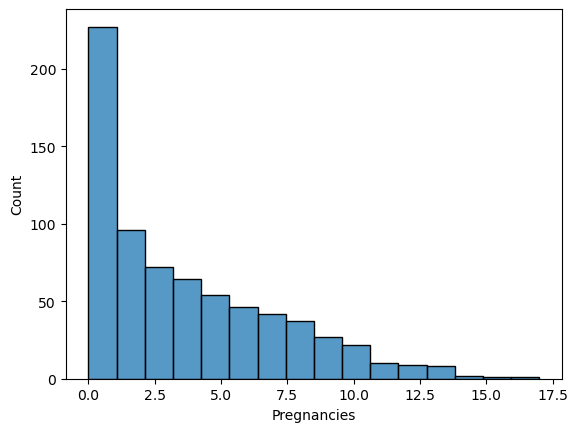

In [103]:
sns.histplot(dia_df.Pregnancies)


<Axes: xlabel='Glucose', ylabel='Density'>

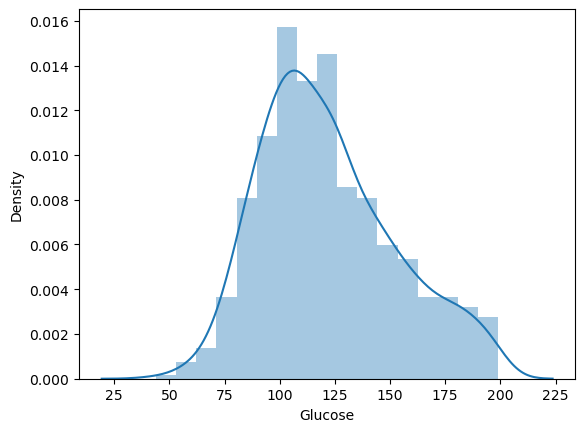

In [105]:
sns.distplot(dia_df.Glucose)

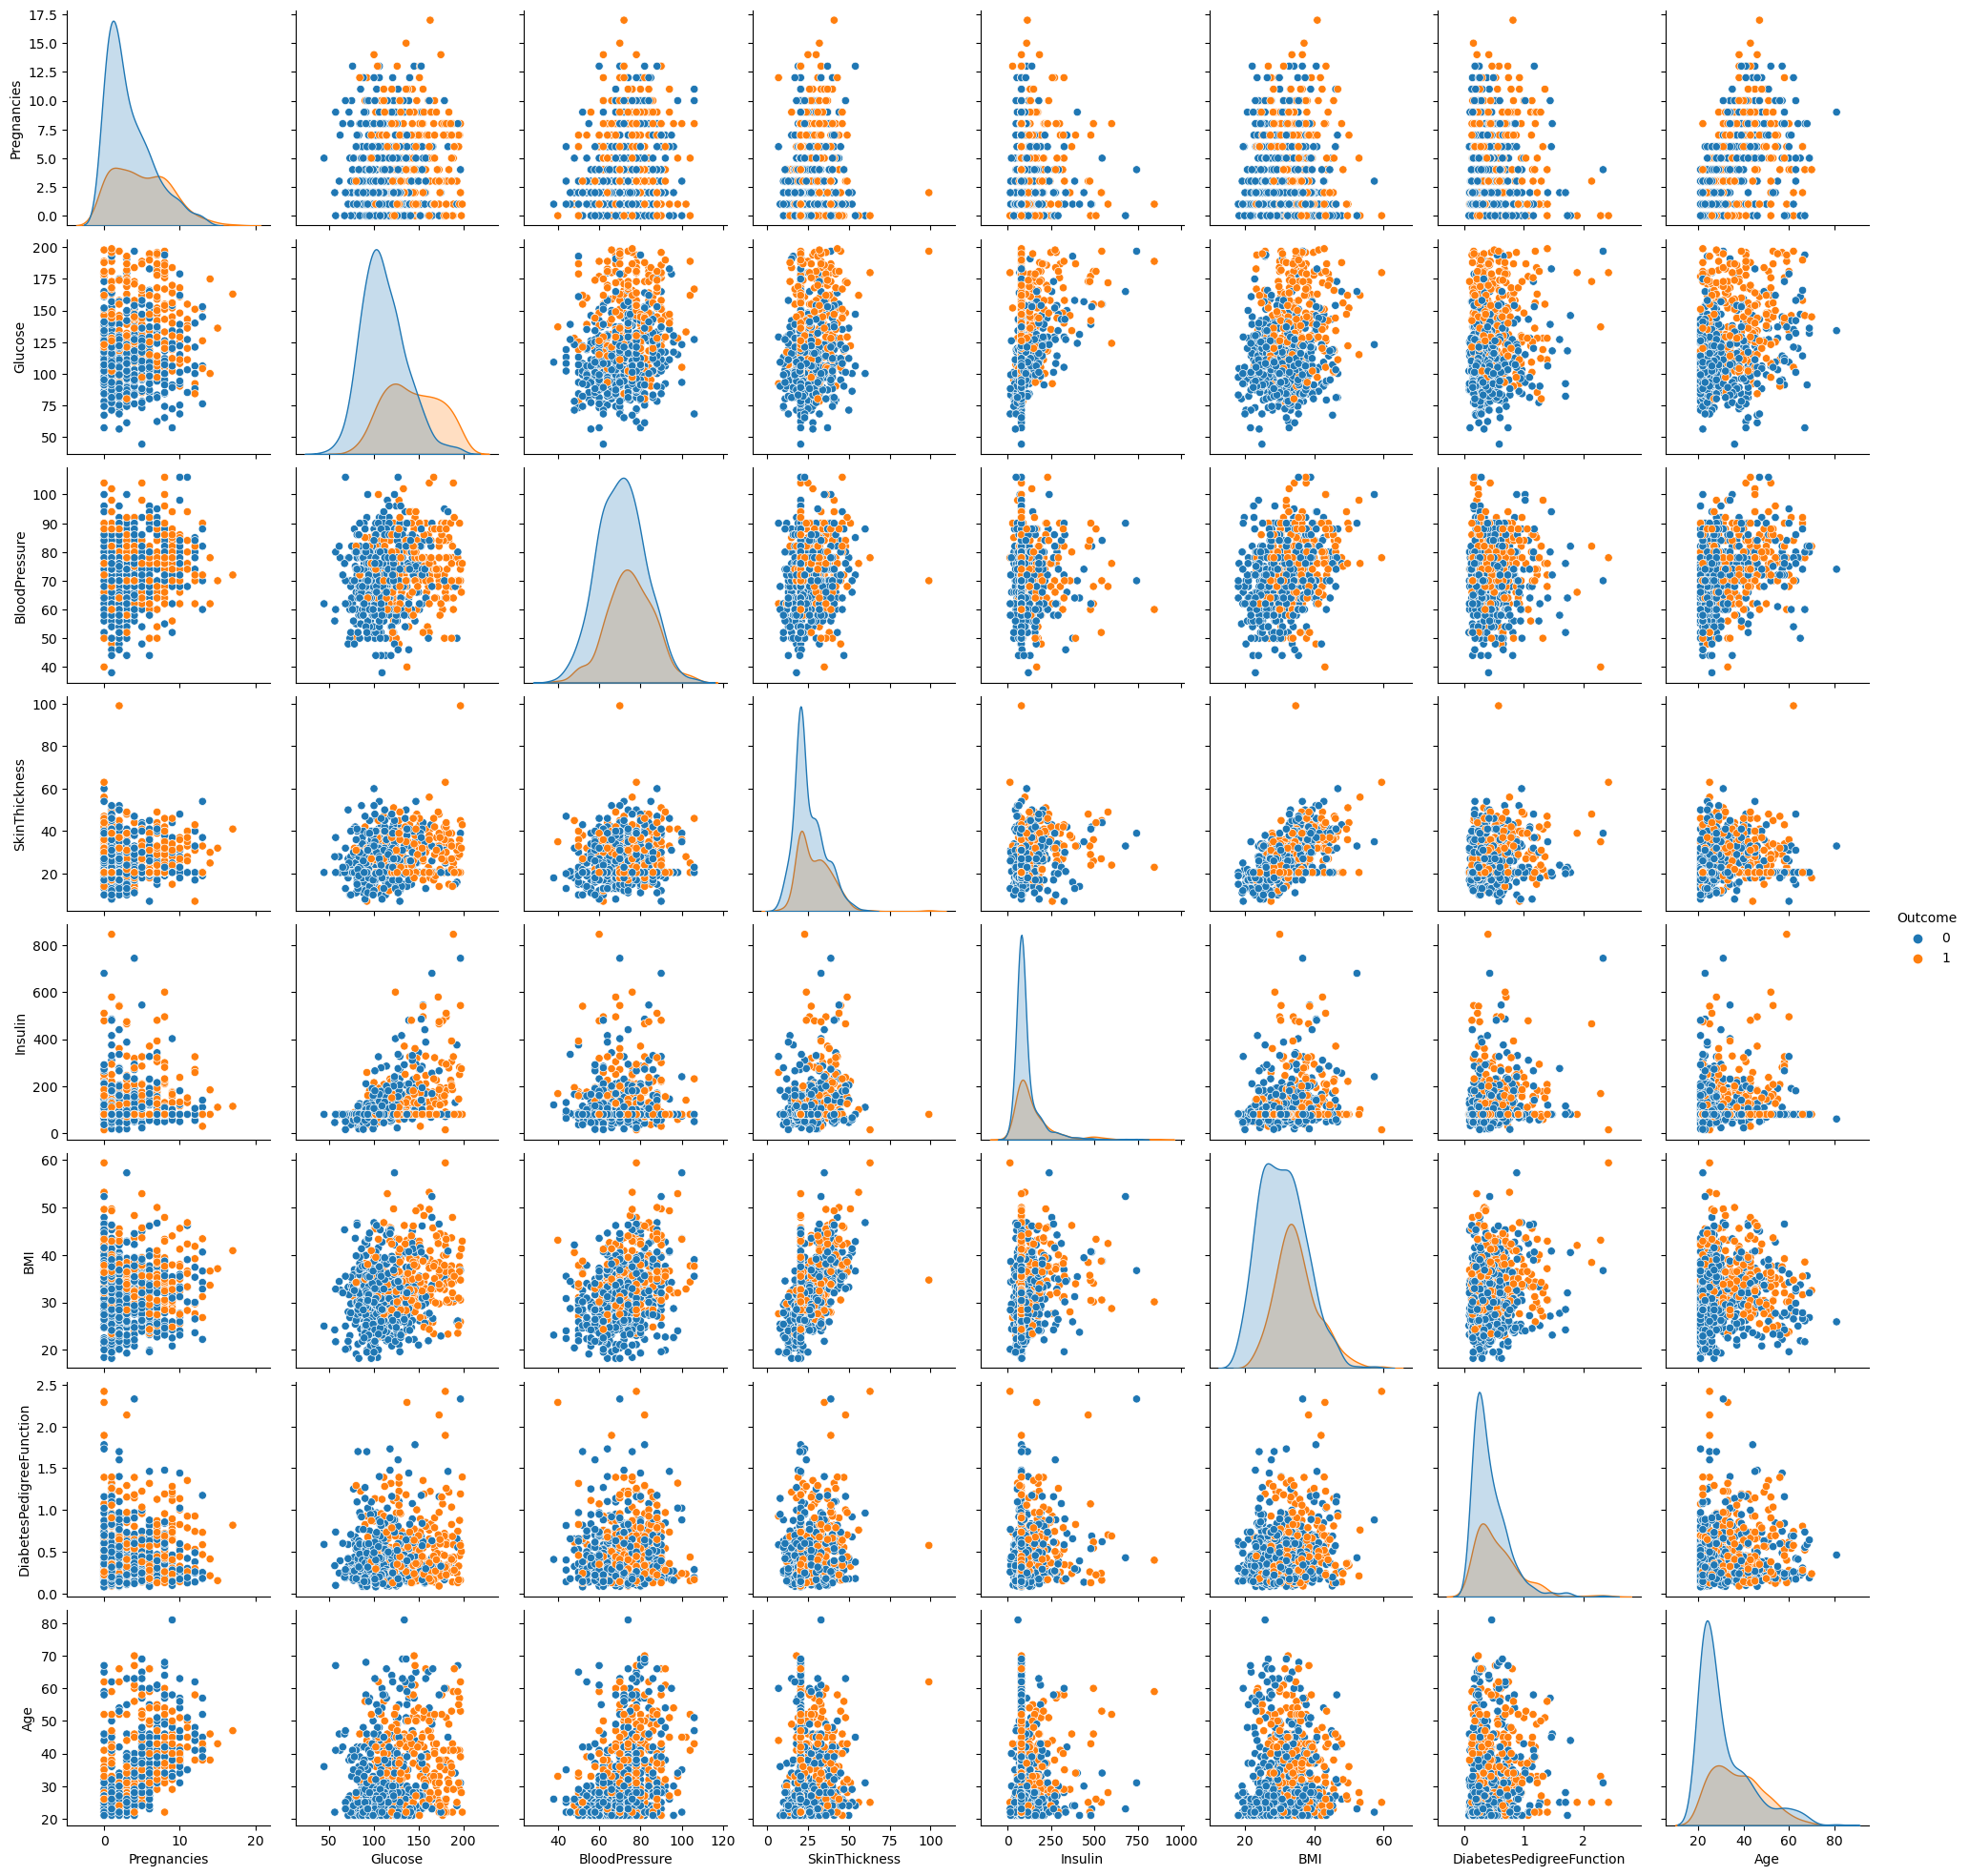

In [107]:
sns.pairplot(data=dia_df,hue='Outcome')